<a href="https://colab.research.google.com/github/namita-ach/SDS-Reviews/blob/main/Normal_and_Poisson_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this guide, we will explore the concepts of Normal Probability Plots and the Poisson Distribution using Python.

We will utilize the tips dataset from the Seaborn library for our normal probability plot and generate synthetic data for the Poisson distribution.

Additionally, we will cover other statistical visualizations, including bar plots and heatmaps, to provide a well-rounded understanding of data analysis techniques. (This is not exactly *part* of your syllabus, but will help deepen your understanding.)

---

**What to remember**
1. Normal Probability Plots help assess whether a dataset follows a normal distribution.
2. The Poisson Distribution is used to model the number of events occurring within a fixed interval of time or space.


## Normal Probability Plots (Q-Q Plots)

This is a graphical tool used to assess if a dataset follows a normal distribution. If the data points follow a straight line, this indicates that the data is normally distributed.

**`scipy.stats.probplot`**
* This function generates a probability plot for assessing whether your data follows a specified distribution.
* Syntax:
```python
scipy.stats.probplot(
    x,
    dist="norm",
    sparams=None,
    fit=True,
    plot=None,
    rvalue=False,
    **kwargs
)
```
* Key Parameters
  * x: (array-like) Input data.
  * dist: (str) The name of the distribution to compare against (default is "norm" for normal).
  * sparams: (tuple) Parameters for the distribution.
  * fit: (bool) If True, fits a line to the data.
  * plot: (matplotlib.axes.Axes) Matplotlib axes object to draw on.
  * rvalue: (bool) If True, returns correlation coefficient.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
# We will use the total bill from the tips dataset for our normal probability plot.
tips = sns.load_dataset('tips')

In [ ]:
# Extract total bill
total_bill = tips['total_bill']

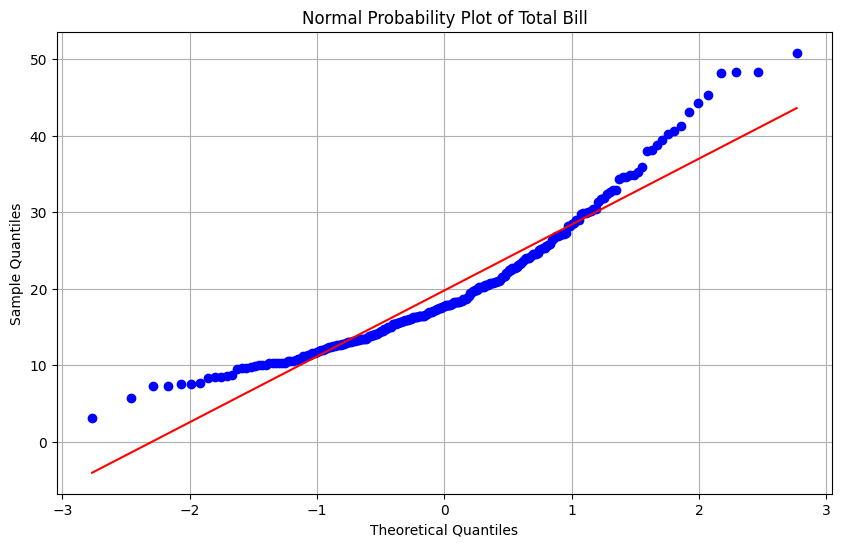

In [ ]:
# Create a Normal Probability Plot
plt.figure(figsize=(10, 6))
stats.probplot(total_bill, dist="norm", plot=plt)
plt.title('Normal Probability Plot of Total Bill')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

### Interpreting the Normal Probability Plot
* Straight Line: If the points closely follow the straight line, it suggests that the total bill is normally distributed.
* Deviations from Line: Significant deviations from the line indicate departures from normality, which may suggest skewness or outliers in the data.

## Central Limit Theorem

The Central limit theorem states that when independent variables are added, their normalized sum tends towards a normal distribution even if the original variables themselves are not normally distributed.

This helps when we're looking at sample means.

### Collecting samples means

In [ ]:
# Central limit theorem with 100 elements each in 1000 samples for 'total_bill'
no_of_elements = 100
num_samples = 1000

In [ ]:
# Collect means from multiple random samples
means = []
for _ in range(num_samples):
    random_index = sample(range(tips.shape[0]), no_of_elements)
    sample_mean = mean(tips.iloc[random_index]['total_bill'])
    means.append(sample_mean)

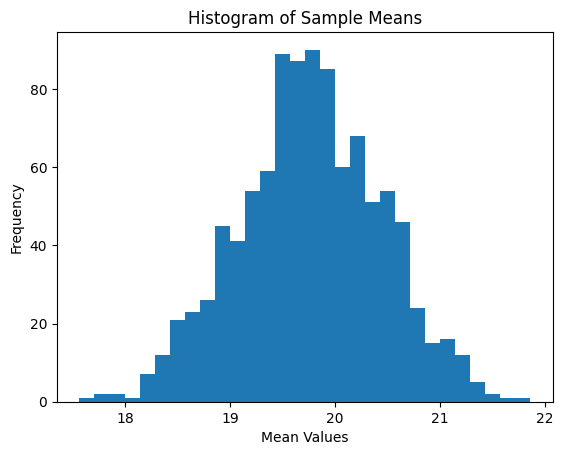

In [ ]:
# Plotting histogram of means
plt.hist(means, bins=30)
plt.xlabel('Mean Values')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Means')
plt.show()

### Scatter Plot of Means v Z-Scores

In [ ]:
from scipy.stats import zscore

In [ ]:
# Calculate Z-scores for means
z_scores = zscore(means)

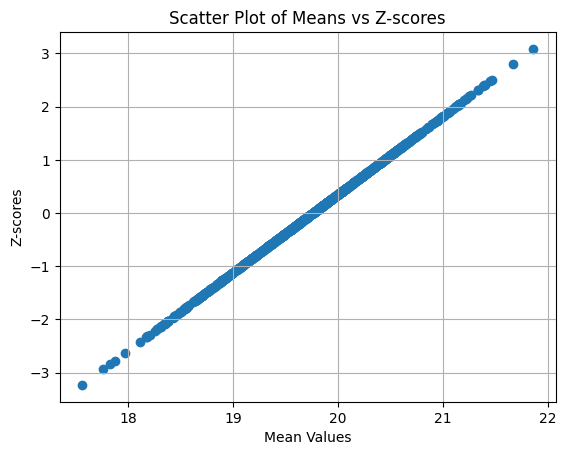

In [ ]:
# Scatter Plot
plt.scatter(means, z_scores)
plt.xlabel('Mean Values')
plt.ylabel('Z-scores')
plt.title('Scatter Plot of Means vs Z-scores')
plt.grid()
plt.show()

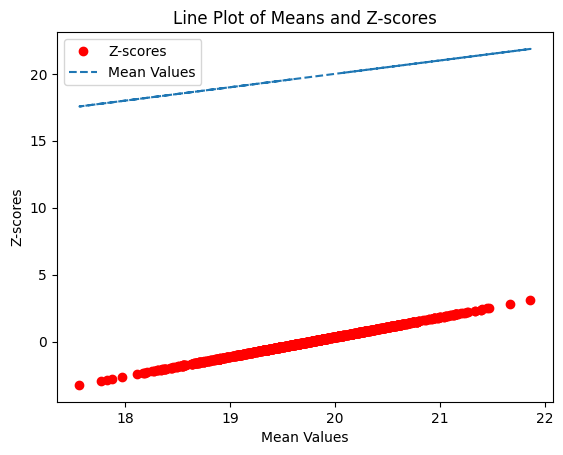

In [ ]:
# Line Plot
plt.plot(means, z_scores, 'ro', label='Z-scores')
plt.plot(means, means, label='Mean Values', linestyle='--')
plt.xlabel('Mean Values')
plt.ylabel('Z-scores')
plt.title('Line Plot of Means and Z-scores')
plt.legend()
plt.show()

### Finding Probabilities in Normal Distributions

In [ ]:
from scipy.stats import norm

In [ ]:
# Here's a sample function, try to make your own!

def prob(x, mu, std):
    z = (x - mu) / std
    print(f'Finding P(z < {z})')
    print(f'Area to left of x : {norm.cdf(z)}')

    print(f'Finding P(z > {z})')
    print(f'Area to right of x : {1 - norm.cdf(z)}')

In [ ]:
data = tips['total_bill']
mu, std = norm.fit(data)

In [ ]:
prob(3, mu, std)

Finding P(z < -1.8894257223589406)
Area to left of x : 0.029417403458809367
Finding P(z > -1.8894257223589406)
Area to right of x : 0.9705825965411906


## Interpreting Probabilities
* The function calculates Z-scores for given values and uses cumulative density functions to find areas under the curve.
* These areas represent probabilities associated with specific thresholds in your dataset.

## Poisson Distribution

In [ ]:
from numpy import mean
from random import sample

The Poisson Distribution models the number of times an event occurs in a fixed interval of time or space. It is characterized by its mean (λ), which is both the average rate at which events occur and the variance of the distribution.

**`numpy.random.poisson()`**

* This function generates random samples from a Poisson distribution.
* Syntax:
```python
numpy.random.poisson(
    lam=1.0,
    size=None
)
```
* Key parameters:
  * lam: (float) The rate parameter (λ), which is both the mean and variance of the distribution.
  * size: (int or tuple of ints) The number of samples to draw.


In [ ]:
# Generating Poisson Distribution Data
# Let’s generate some synthetic data using a Poisson distribution with a specified lambda value-
import numpy as np

In [ ]:
np.random.seed(42) # set a random seed for reproducibility

In [ ]:
# Define lambda (which is the average rate of occurrence)
lambda_value = 5  # Average number of events in an interval

In [ ]:
# Generate Poisson distributed data
poisson_data = np.random.poisson(lam=lambda_value, size=1000)

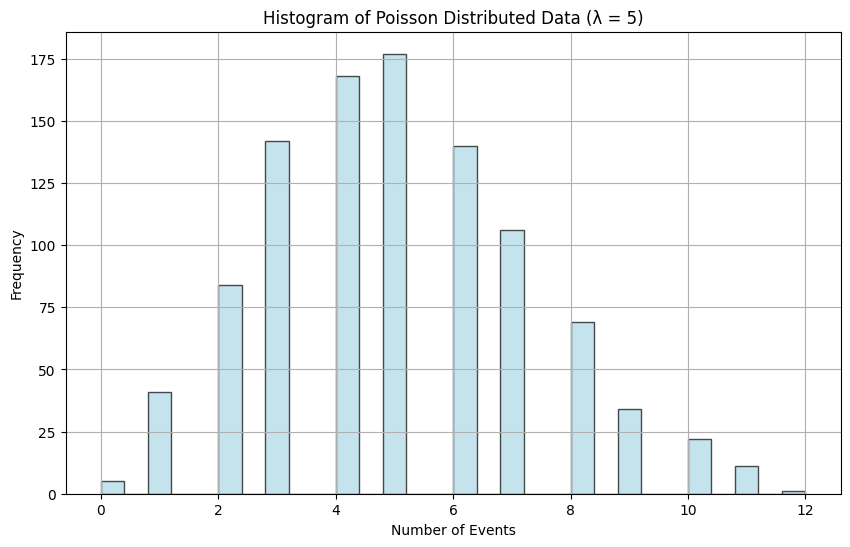

In [ ]:
# Create a histogram to visualize the Poisson distribution
plt.figure(figsize=(10, 6))
plt.hist(poisson_data, bins=30, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Poisson Distributed Data (λ = 5)')
plt.xlabel('Number of Events')
plt.ylabel('Frequency')
plt.grid()
plt.show()

## Interpreting the Poisson Distribution Histogram
* Shape: The histogram typically shows a right-skewed distribution, especially for smaller λ values.
* Mean and Variance: For a Poisson distribution, both the mean and variance are equal to λ.
  * In this case, with λ = 5, we see that most counts cluster around 5 with fewer occurrences at higher counts.

---
For concepts, jump [here](https://namitalearns.substack.com/p/sds-reviews-normal-and-poisson-distributions).